## Load Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## Load All Data

In [3]:
# path = "C:/Users/galeaj-admin/AppData/LocalLow/DefaultCompany/QuestHandTrackingTest/ptx_07_joe/"
# path = "C:/Users/galeaj-admin/Downloads/QuestTrackingAccuracy-main/QuestTrackingAccuracy-main/ptx_999_diar/"
path = "C:/Users/ActionLab/AppData/LocalLow/DefaultCompany/QuestHandTrackingTest/diar_001/"
# fileName = "pilot_999_12_Target_row_A1_Trial_58_.json"

# df = pd.read_json(path + fileName)
df = None

i = 0
for filename in os.listdir(path):
    if filename.endswith(".json"):  # or filename.endswith(".py") # print(os.path.join(directory, filename))
        tmpDF = pd.read_json(path + filename)    
        
        tmpDF.insert(0, "Trial", i , True)
        
        if df is None:
            df = tmpDF
        else:
            df = pd.concat((df, tmpDF)) 
        
        i = i+1
        continue
    else:
        continue

In [4]:
df

,Trial,frameNum,gameObjectName,xPos,yPos,zPos,xRot,yRot,zRot,targetID,xTPos,yTPos,zTPos,time
0,0,0,realFingerTip,-0.865736,0.374911,0.136675,0.000000,0.000000,0.000000,row_C4,-0.784844,0.300414,0.455248,53.215150
1,0,0,b_r_index_null,-0.834294,0.402523,0.136769,339.537628,254.367065,330.521000,row_C4,-0.784844,0.300414,0.455248,53.215150
2,0,0,r_index_fingernail_marker,-0.834555,0.405681,0.143301,339.537628,254.367065,330.521000,row_C4,-0.784844,0.300414,0.455248,53.215150
3,0,0,r_index_finger_tip_marker,-0.838177,0.398286,0.145951,339.537628,254.367065,330.521000,row_C4,-0.784844,0.300414,0.455248,53.215150
4,0,0,r_index_finger_pad_marker,-0.836593,0.396164,0.136510,339.537628,254.367065,330.521000,row_C4,-0.784844,0.300414,0.455248,53.215150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,17,83,b_r_index3,-0.960043,0.300088,0.237725,347.627800,253.282364,331.561900,row_A3,-0.983980,0.298208,0.255406,1.151825
996,17,83,b_r_index2,-0.950314,0.311919,0.218856,347.793800,249.649246,330.126300,row_A3,-0.983980,0.298208,0.255406,1.151825
997,17,83,b_r_index1,-0.935850,0.316095,0.184045,350.597717,248.487335,353.593475,row_A3,-0.983980,0.298208,0.255406,1.151825
998,17,83,b_r_wrist,-0.883031,0.312745,0.100245,346.939484,251.440552,3.153383,row_A3,-0.983980,0.298208,0.255406,1.151825


## Plot data

## Changes to be made:
Currently xPos... is a long arrange, which holds all the position data from the one trial i.e. not distinguishing the trials.

Make xPos etc. into a 2D array which should hold pos data for each trial. 


Text(0, 0.5, 'Z-axis')

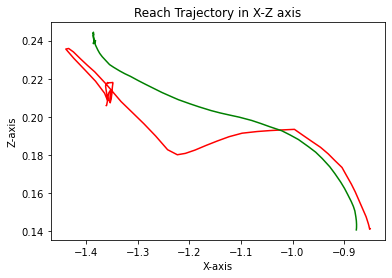

In [5]:
# xPos = df.xPos[df.gameObjectName[df.gameObjectName == 'b_r_index_null']]
# zPos = df.zPos[df.gameObjectName[df.gameObjectName == 'b_r_index_null']]

maskVR = (df["gameObjectName"]=="b_r_index_null") & (df['targetID'] == 'row_A1')  #& (df['Trial'] == 0)
maskMc = (df["gameObjectName"]=="realFingerTip")  &  (df['targetID'] == 'row_A1')  #& (df['Trial'] == 0)

xPos =  df.loc[maskVR , 'xPos']
zPos =  df.loc[maskVR, 'zPos']
xPosM = df.loc[maskMc, 'xPos']
zPosM = df.loc[maskMc, 'zPos']

plt.plot(xPos,zPos,'r')
plt.plot(xPosM,zPosM,'g')
plt.title('Reach Trajectory in X-Z axis')
plt.xlabel('X-axis')
plt.ylabel('Z-axis')

In [16]:
x = sxPosM
type(x)

x2 = np.insert(x, 0, 0)

print('Orig: ', len(x), ' New: ', len(x2))

print(type(xPos.tolist()))
xPos2 = np.insert(xPos.tolist(),0,0)

print('xpos len: ', len(xPos), ' xPos2: ', len(xPos2))

Orig:  113  New:  114
<class 'list'>
xpos len:  113  xPos2:  114


Original number of values (113,)
Unique quest (113,)
Unique marker (113,)


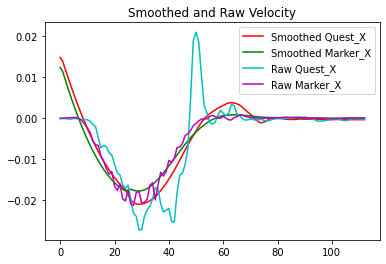

In [18]:
from scipy.signal import savgol_filter

print("Original number of values", np.shape(xPos))
print("Unique quest", np.shape(np.unique(xPos)))
print("Unique marker", np.shape(np.unique(xPosM)))

sxPos = savgol_filter(xPos, 51, 3)
sxPosM = savgol_filter(xPosM, 51, 3)

# sxPos2 = np.insert(sxPos,0,0)
# sxPosM2 = np.insert(sxPosM,0,0)
# xPos2 = np.insert(xPos.tolist(),0,0)
# xPosM2 = np.insert(xPos.tolist(),0,0)

plt.plot(np.gradient(sxPos),'r')
plt.plot(np.gradient(sxPosM),'g')
plt.plot(np.gradient(xPos),'c')
plt.plot(np.gradient(xPosM),'m')

plt.title("Smoothed and Raw Velocity")
plt.legend(["Smoothed Quest_X","Smoothed Marker_X","Raw Quest_X","Raw Marker_X"])

# plt.figure()
# t = np.diff(time)
# # plt.plot(t[40:],'b')
# plt.plot(time,'b')
# print('Time length: ', np.shape(time))

In [ ]:
df['targetID'].unique()

In [ ]:
np.shape(xPos)

### Average Curve

In [ ]:
# plt.figure()
x = np.arange(0,len(xPos))
xVR_mean = np.mean(xPos, axis=0)  
xVR_SE = np.round(np.std(xPos, axis=0)/np.sqrt(len(xPos)),4)
plt.errorbar(x, xVR_mean, xVR_SE, marker='o',ls='''''',mfc='k',mec='k', ms=7, mew=2,mfcalt='k')

# ydata = np.mean(yCurve_13, axis=0)
# # yerr = np.std(yCurves, axis=0)/np.sqrt(curveArrShape[0])
# yerr = np.std(yCurve_13, axis=0)

# plt.plot(xLine_13cm, ydata)
# plt.fill_between(xLine_13cm, ydata-yerr, ydata+yerr, alpha=0.5)
# # plt.xticks(x,proprioceptiveVals)
# plt.xlabel("\n <-Closer Virtual Hand Position ->Further / m \n")
# plt.ylabel("\n P(Real Hand Closer) \n")
# plt.ylim([-0.01, 1.01])

# plt.tight_layout()
# plt.savefig('Psych Curve for 13 cm Target.png', dpi = 600)

In [ ]:
np.shape(xPosM)
type(xPos)

In [ ]:
import math
import sys

import numpy as np
import numpy.linalg
import pylab as py

def sg_filter(x, m, k=0):
    """
    x = Vector of sample times
    m = Order of the smoothing polynomial
    k = Which derivative
    """
    mid = len(x) / 2        
    a = x - x[mid]
    expa = lambda x: map(lambda i: i**x, a)    
    A = np.r_[map(expa, range(0,m+1))].transpose()
    Ai = np.linalg.pinv(A)

    return Ai[k]

def smooth(x, y, size=5, order=2, deriv=0):
    
#     if deriv > order:
#         raise Exception, "deriv must be <= order"

    n = len(x)
    m = size

    result = np.zeros(n)

    for i in xrange(m, n-m):
        start, end = i - m, i + m + 1
        f = sg_filter(x[start:end], order, deriv)
        result[i] = np.dot(f, y[start:end])

    if deriv > 1:
        result *= math.factorial(deriv)

    return result